In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

### **Data Import**

In [386]:
data = pd.read_csv('Sales_Data.csv')

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


### **Data Exploration**

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [388]:
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [389]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [390]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


### **Data Visualization**

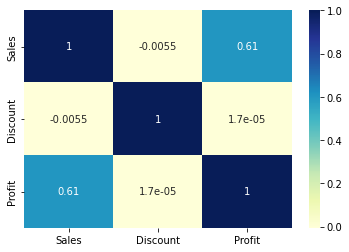

In [391]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


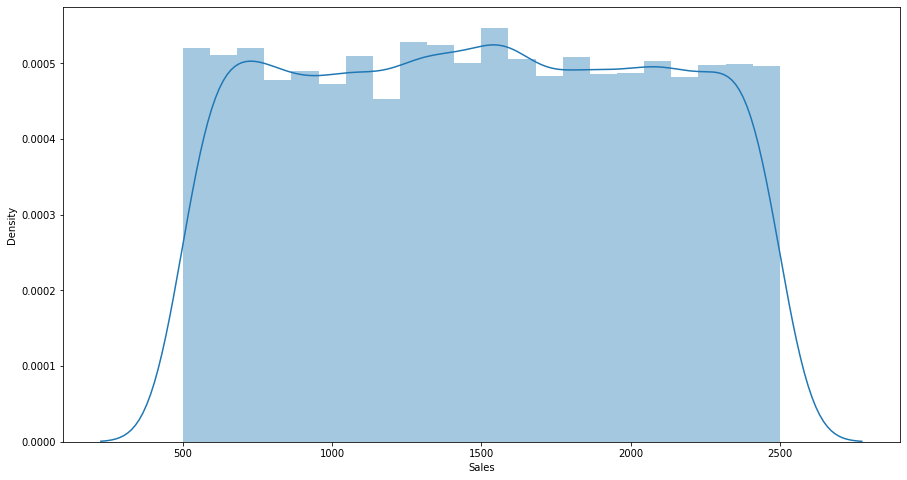

In [392]:
plt.figure(figsize=(15,8))
sns.distplot(data['Sales'])
plt.show()

### **Data Preprocessing**

In [393]:
data.drop(['Order ID','Customer Name','Discount','Profit','State'],axis=1,inplace=True)

In [394]:
data.head()

,Category,Sub Category,City,Order Date,Region,Sales
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355


In [395]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

In [396]:
data['Category'] = encoder1.fit_transform(data['Category'])
data['City'] = encoder2.fit_transform(data['City'])
data['Region'] = encoder3.fit_transform(data['Region'])
data['Sub Category'] = encoder4.fit_transform(data['Sub Category'])

data.head()

,Category,Sub Category,City,Order Date,Region,Sales
0,5,14,21,11-08-2017,2,1254
1,1,13,8,11-08-2017,3,749
2,3,0,13,06-12-2017,4,2360
3,4,12,4,10-11-2016,3,896
4,3,18,12,10-11-2016,3,2355


In [397]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
monthly_sales = data.resample('M').sum()
monthly_sales.reset_index(inplace=True)

monthly_sales['week_of_year'] = monthly_sales['Order Date'].dt.weekofyear

monthly_sales.head()

<ipython-input-397-12c57424e2ab>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  monthly_sales['week_of_year'] = monthly_sales['Order Date'].dt.weekofyear


,Order Date,Category,Sub Category,City,Region,Sales,week_of_year
0,2015-01-31,227,939,885,170,122497,5
1,2015-02-28,144,539,532,91,66030,9
2,2015-03-31,465,1790,1788,359,247156,14
3,2015-04-30,451,1640,1578,330,203258,18
4,2015-05-31,380,1412,1417,230,164263,22


### **Data Partioning**

In [398]:
train_data, test_data, train_labels, test_labels = train_test_split(monthly_sales.drop(['Sales','Order Date'],axis=1), monthly_sales['Sales'], test_size=0.2)

In [399]:
train_data.head()

,Category,Sub Category,City,Region,week_of_year
5,395,1395,1610,222,27
4,380,1412,1417,230,22
10,960,3531,3642,630,49
31,487,2090,2074,340,35
0,227,939,885,170,5


### **RandomForestRegressor Model**

In [400]:
from sklearn.ensemble import RandomForestRegressor

In [401]:
model = RandomForestRegressor()
model.fit(train_data, train_labels)

predictions = model.predict(test_data)

In [402]:
mse = metrics.mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 206834937.81957


### **XGBRegressor Model**

In [403]:
from xgboost import XGBRegressor

In [404]:
XGB_model = XGBRegressor()

In [405]:
XGB_model.fit(train_data,train_labels)

[22:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [406]:
XGB_output = XGB_model.predict(test_data)

In [407]:
XGB_mse = metrics.mean_squared_error(test_labels,XGB_output )
print('Mean Squared Error:', XGB_mse)

Mean Squared Error: 280225968.0496338


### **Results**

As it is visible from root mean square values of both models, RandomForestRegressor is better than XGBRegressor model.

In [408]:
import pickle

pickle.dump(model,open('Sapre.pkl','wb'))

### **Custom Input**

In [417]:
custom_input = [['Oil & Masala', 'Vellore', 'North', 'Masalas',14]] # ['Category','City','Region','Sub Category']

custom_input[0][0] = encoder1.transform([custom_input[0][0]])[0]
custom_input[0][1] = encoder2.transform([custom_input[0][1]])[0]
custom_input[0][2] = encoder3.transform([custom_input[0][2]])[0]
custom_input[0][3] = encoder4.transform([custom_input[0][3]])[0]

predicted_sales = model.predict(custom_input)

# Print the predicted sales
print('Predicted Sales:', predicted_sales[0])

Predicted Sales: 104927.57


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
